In [1]:
import numpy as np
import math
import time
from scipy.stats import expon
from scipy.stats import uniform
import matplotlib.pyplot as plt


The efficient solutions s(k)
[[0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0]
 [0 0 1 1 1 0 0 0 0]
 [0 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 0 0 0 0]
 [1 1 1 2 1 0 0 0 0]
 [1 1 1 2 1 1 0 0 0]
 [1 1 1 2 1 1 1 0 0]
 [1 1 1 2 1 1 1 1 0]
 [1 1 1 2 1 1 2 1 0]
 [1 1 1 2 1 1 2 1 1]
 [1 1 2 2 1 1 2 1 1]
 [1 1 2 3 1 1 2 1 1]
 [1 1 2 3 1 2 2 1 1]]


Text(0.5, 1.0, 'EBO over cost')

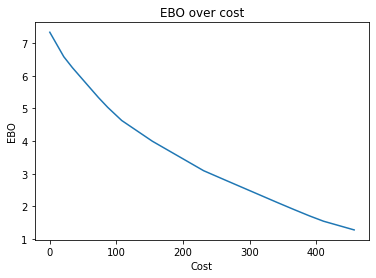

In [2]:
#Part 1: Spare parts optimization with marginal allocation

lambda_vec = np.array([0.0514, 0.0479,0.0486,0.0553,0.0293,0.0559,0.0666,0.0384,0.0173])
T_vec = np.array([7,     9,    17,    25,    14,    18,    35,     9,    14])
c_vec = np.array([14,    15,    24,    21,    13,    46,    77,    33,    25])
s_vec = np.full((9), 0)
size = len(lambda_vec)
C_max = 500


def R(lambd, T, k):
  
  if k == 0:
    return (1 - np.exp(-lambd*T))

  return R(lambd, T, k-1) - (((lambd*T)**k)/np.math.factorial(k) * np.exp(-lambd*T))

table = np.zeros((size,size))
R_vec = np.zeros((size,size))


for i in range(size):
  for j in range(size):
    R_vec[i,j] = R(lambda_vec[i], T_vec[i], j)
    table[i,j] = R_vec[i,j] / c_vec[i]

#Initial expected number of backorders for each LRU
EBO_vec = np.zeros((9))
for i in range(len(EBO_vec)):
  EBO_vec[i] = lambda_vec[i]*T_vec[i]
#Marginal allocation algorithm
cost = 0
k = 0

cost_s = np.zeros((1), dtype=np.int64)
while cost < C_max:

  #Find largest quotient and cancel
  largest_q = np.max(table)
  l,j = np.where(table == largest_q) # l is the number of the column where largest quotient was found
  table[l,j] = 0

  k += 1
  EBO_vec[l] = EBO_vec[l] - R_vec[l, s_vec[l]]
  s_vec[l] = s_vec[l] + 1
  cost += c_vec[l]

  if k == 1:
    s_solution = np.array([s_vec])
    EBO_s = np.array([EBO_vec])
    cost_s[0] = cost
  else:
    if cost < C_max:
      s_solution = np.concatenate((s_solution, [s_vec]), axis=0)
      EBO_s = np.concatenate((EBO_s, [EBO_vec]), axis=0)
      cost_s = np.append(cost_s, cost)


print("The efficient solutions s(k)") # The efficient solutions s(k)
s_solution = np.insert(s_solution, 0, np.zeros((9)), axis=0)
print(s_solution)
EBO_plot = np.zeros(shape=(EBO_s.shape[0]))
for i in range(EBO_s.shape[0]):
  EBO_plot[i] = np.sum(EBO_s[i])
EBO_plot = np.insert(EBO_plot, 0, lambda_vec @ T_vec)
cost_s = np.insert(cost_s, 0, 0)
#print(EBO_plot)
#print(cost_s)

plt.plot(cost_s, EBO_plot)
plt.xlabel("Cost")
plt.ylabel("EBO")
plt.title("EBO over cost")





In [3]:
#Part 1.2  EBO at s = 2

s=2
lambda_vec = np.array([0.0514, 0.0479,0.0486,0.0553,0.0293,0.0559,0.0666,0.0384,0.0173])
T_vec = np.array([7,     9,    17,    25,    14,    18,    35,     9,    14])
c_vec = np.array([14,    15,    24,    21,    13,    46,    77,    33,    25])
s_vec = np.full((9), 2)
size = len(lambda_vec)

def getEBO(lambd, T, s, index):
    R = 0
    s = int(s)
    for i in range(0,s):
      R += R_vec[index, i]


    return lambd*T - R

table = np.zeros((size,size))
R_vec = np.zeros((size,size))

for i in range(size):
  for j in range(size):
    R_vec[i,j] = R(lambda_vec[i], T_vec[i], j)
    table[i,j] = R_vec[i,j] / c_vec[i]


#def getR(lambd, T, s):
#  R=0
#  for i in range(1, 100):
#    R += (lambd*T)**i/np.math.factorial(i)*np.exp(-lambd*T)
#    return R


EBOvec = []
EBOsum = 0 
cost_vec = c_vec * s
cost_total = 0 
print(cost_vec)

for i in range (0,size):
  EBO = getEBO(lambda_vec[i],T_vec[i],2, i)
  EBOvec.append(EBO)
  EBOsum += EBO

  cost_total += cost_vec[i]


print("Ebovec",EBOvec)
print("EBOsum",EBOsum)
print("total cost",cost_total)





[ 28  30  48  42  26  92 154  66  50]
Ebovec [0.006505902510998862, 0.010814018683791782, 0.06325437941361123, 0.23133970163457018, 0.009409958900445214, 0.10528368906406693, 0.7519667033878483, 0.005805239053919831, 0.002100945917163033]
EBOsum 1.1864805385664154
total cost 536


Budget: 0
optimal allocation: [0. 0. 0. 0. 0. 0. 0. 0. 0.]
EBO: 7.334800000000001
Cost: 0.0
Budget: 100
optimal allocation: [0. 1. 1. 2. 1. 0. 0. 0. 0.]
EBO: 4.934660589002854
Cost: 94.0
Budget: 150
optimal allocation: [0. 1. 1. 2. 1. 1. 0. 0. 0.]
EBO: 4.300266233691852
Cost: 140.0
Budget: 350
optimal allocation: [1. 1. 1. 2. 1. 1. 2. 1. 0.]
EBO: 2.126844361080293
Cost: 341.0
Budget: 500
optimal allocation: [2. 2. 2. 3. 2. 2. 2. 1. 1.]
EBO: 1.0967799202818587
Cost: 499.0


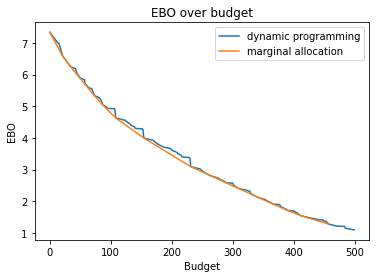

In [4]:
#Part 2 dynamic programming

def R(lambd, T, k):
  
  if k == 0:
    return (1 - np.exp(-lambd*T))

  return R(lambd, T, k-1) - (((lambd*T)**k)/np.math.factorial(k) * np.exp(-lambd*T))

#initial data
lambda_vec = np.array([0.0514, 0.0479,0.0486,0.0553,0.0293,0.0559,0.0666,0.0384,0.0173])
T_vec = np.array([7,     9,    17,    25,    14,    18,    35,     9,    14])
c_vec = np.array([14,    15,    24,    21,    13,    46,    77,    33,    25])
size = len(lambda_vec)

R_mat = np.zeros((size,size))
for i in range(size):
  for j in range(size):
    R_mat[i,j] = R(lambda_vec[i], T_vec[i], j)

C_Max = 501
s_star = np.zeros((C_Max, size))
EBO_vec = np.zeros(C_Max)
EBO_vec[:] = np.dot(lambda_vec,T_vec)
cost = np.zeros(C_Max)
EBO_temp = np.full_like(lambda_vec, np.max(EBO_vec))

for n in range(C_Max):
  #stage n is the subproblem budget
  if n < np.min(c_vec):
      continue
  else:
      for j in range(size):
          if n >= (c_vec @ s_star[n-c_vec[j]]) + c_vec[j]: # Checks if we can afford more
              EBO_temp[j] = EBO_vec[n-c_vec[j]] - R_mat[j,int(s_star[n-c_vec[j],j])]

      best_EBO = np.min(EBO_temp)
      k = np.where(EBO_temp == best_EBO)[0][0]

      if best_EBO < np.min(EBO_vec): 
          s_star[n] = s_star[n-c_vec[k]]
          s_star[n,k] = s_star[n-c_vec[k],k] + 1
          EBO_vec[n] = best_EBO
      else:
          s_star[n,:] = s_star[n-1]
          EBO_vec[n] = EBO_vec[n-1]
      cost[n] = c_vec @ s_star[n]
      EBO_temp = np.full_like(lambda_vec, np.max(EBO_vec)) #reset EBO_temp for comparison 


#print(s_star[0:60,:])
#print(c_vec)
index = [0,100,150,350,500]
for i in index:
  print("Budget:", i)
  print("optimal allocation:",s_star[i, :])
  print("EBO:",EBO_vec[i])
  print("Cost:",cost[i])


plt.plot(cost,EBO_vec)
plt.plot(cost_s, EBO_plot)
plt.xlabel("Budget")
plt.ylabel("EBO")
plt.title("EBO over budget")
plt.legend(["dynamic programming", "marginal allocation"])

